# 3. Algoritmos del aprendizaje automático

## 3.1 Regresión lineal

### 3.1.1 Implementación del algoritmo de Regresión Lineal en Python

In [1]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn import datasets

In [2]:
n_samples = 100

X, Y = datasets.make_regression( n_samples = n_samples , n_features =1,
                                n_informative =1, noise =10)

In [3]:
np.std(X)

0.93071476057161995

In [4]:
np.max(X)

2.1378279922934271

In [5]:
X = np. concatenate ([X, np. ones (( n_samples ,1))], axis =1)

In [6]:
temp = np. linalg . inv(np.dot(X.T, X))
w = np.dot(np.dot(temp ,X.T),Y)

En lugar de calcular la inversa de $X^TX$ podemos resolver la ecuación $X^TX w = X^T Y$ mediante la función np.linalg.lstsq(),que es más numericamente estable que calcular una inversa.

In [7]:
w,_,_,_ = np.linalg.lstsq(np.dot(X.T, X), np.dot(X.T, Y))

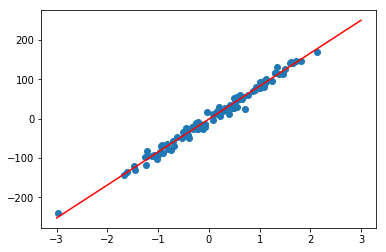

In [8]:
%matplotlib inline 
plt.scatter (X[:,0],Y)

ys = np.array ([w[0]*x+w[1] for x in range (-3,4,1)])
plt.plot ( range (-3,4,1), ys , c="r")

plt.show()

### 3.1.2 Regresión lineal en Scikit-learn

In [9]:
from sklearn . linear_model import LinearRegression
from sklearn import datasets
n_samples = 500
X, Y = datasets . make_regression ( n_samples = n_samples , n_features =3,
n_informative =2, noise =10)

In [10]:
from sklearn . model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split (X,Y, train_size =0.7)

In [11]:
lr = LinearRegression ().fit( X_train , Y_train )

In [12]:
lr. predict ([[0.3, 1, 2]]) # Imprime [57.322]

array([ 66.09847805])

In [13]:
print( np.mean (( lr.predict ( X_train ) - Y_train ) ** 2)) # Imprime 108.32
print( np.mean (( lr.predict ( X_test ) - Y_test ) ** 2)) # Imprime 116.25


88.6629973209
96.6288481517


## 3.2 k-Vecinos más cercanos

### 3.2.1 k-Vecinos más cercanos en Scikit-Learn

In [14]:
from sklearn.datasets import load_iris

data = load_iris ()
Y = data ["target"]
X = data ["data"]

In [15]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split (X,Y)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier ( n_neighbors =3, metric ="euclidean")
knn .fit( X_train , Y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
print (knn. predict ([[ 5.5, 2.4, 3.8, 1.1]])) # imprime [1]

[1]


In [18]:
print (knn. score (X_test , Y_test )) # imprime 0. 97368

0.947368421053


## 3.3 Máquinas de Soporte Vectorial

### 3.3.2 Máquinas de Soporte Vectorial en Scikit-Learn

In [19]:
from sklearn.datasets import load_digits

data = load_digits ()
Y = data ["target"]
X = data ["data"]

In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split (X,Y)

In [21]:
from sklearn .svm import SVC , LinearSVC

svmPoly = SVC( kernel ="poly", degree =2, coef0 =0)
svmPoly.fit( X_train , Y_train )

lsvm = LinearSVC ()
lsvm.fit( X_train , Y_train )

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [22]:
print (svmPoly.predict ( [X_test [0]]) )
print (lsvm.predict ( [X_test [0]]) )

[8]
[8]


In [23]:
print (svmPoly.score (X_test , Y_test )) # Imprime 0. 9844
print (lsvm.score (X_test , Y_test )) # Imprime 0.94

0.988888888889
0.951111111111


## 3.4 Análisis de Componentes Principales (PCA)

### 3.4.1 Implementación del Análisis de Componentes Principales en Python

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
data = load_iris ()
X = data ["data"]
Y = data ["target"]

Se centran los datos restando a cada característica su media

In [25]:
X = X-np. mean (X, axis =0) 

In [26]:
k = 2
n = float (X. shape [0])

Pasos 1 y 2, se calculan la media y la matriz de covarianza:

$\Sigma = \frac{1}{n-1}{}(X-\mu)^\top(X-\mu)$

In [27]:
mu = np.mean (X, axis =0)
cov = np.dot ((X-mu).T ,(X-mu))/(n-1)

Alternativamente, podemos usar la función de numpy para el cálculo de la matriz de covarianza.

In [28]:
cov = np.cov(X.T)

Paso 3, Calculamos los eigenvectores y sus eigenvalores asociados

In [29]:
evals , evects = np.linalg.eig(cov )

Paso 4, ordenamos los eigenvectores por eigenvalor descendiente y formamos la matriz de proyección con los eigenvectores de mayor eigenvalor como columnas.

In [30]:
indices = np.argsort ( evals )[::-1]

In [31]:
evals = evals [ indices ]
evects = evects.T[ indices ]

In [32]:
W = np.concatenate ([ evects [i]. reshape (-1,1) for i in range (k)], axis =1)
print (W.shape) # Imprime (4,2)

(4, 2)


Proyectamos el conjunto de datos y lo visualizamos en 2D

In [33]:
Xpca = np.dot (X,W)
print (Xpca.shape) # Imprime (150 ,2)

(150, 2)


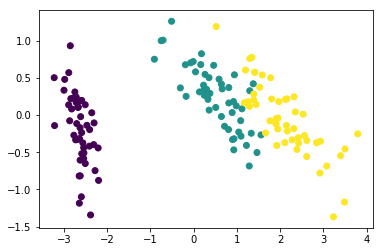

In [34]:
plt.scatter ( Xpca [:,0],Xpca [:,1], c=Y)
plt.show ()

### 3.4.2 Análisis de Componentes Principales en Scikit-Learn

In [35]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

import numpy as np

data = load_iris ()
X = data ["data"]
Y = data ["target"]
X = X-np.mean (X, axis =0)

In [36]:
pca = PCA( n_components =2)
Xpca = pca.fit (X)

In [37]:
Xpca = pca.transform (X)

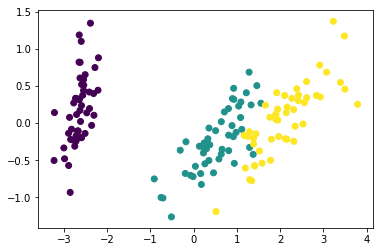

In [38]:
plt.scatter ( Xpca [:,0],Xpca [:,1], c=Y)
plt.show()